In [1]:
import pandas as pd

## Read pickle file

In [2]:
df = pd.read_pickle("/home/robotics/content-classification/data_processing/processed_data.pkl")
df.head()

,Index,Name,Year,Genre,Rating,Poster_path
0,tt0000041,Bataille de neige,1897,Documentary,6.7,/home/robotics/Documents/data/Posters/1897/tt0...
1,tt0223958,La prise de Tournavos,1897,Short,5.5,/home/robotics/Documents/data/Posters/1897/tt0...
2,tt0216924,Mr. Edison at Work in His Chemical Laboratory,1897,Documentary,5.1,/home/robotics/Documents/data/Posters/1897/tt0...
3,tt0222735,Après le bal,1897,Short,5.4,/home/robotics/Documents/data/Posters/1897/tt0...
4,tt0223223,Entre Calais et Douvres,1897,Short,5.5,/home/robotics/Documents/data/Posters/1897/tt0...


In [3]:
df = df.dropna(axis=0)
df['Year'] = df['Year'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48453 entries, 0 to 48452
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        48453 non-null  object 
 1   Name         48453 non-null  object 
 2   Year         48453 non-null  int32  
 3   Genre        48453 non-null  object 
 4   Rating       48453 non-null  float64
 5   Poster_path  48453 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 2.4+ MB


In [4]:
df['Genre'].value_counts()

Comedy         11761
Drama          11572
Action          6310
Documentary     4601
Crime           3137
Animation       2325
Horror          2306
Adventure       2065
Biography       1482
Short            731
Thriller         371
Family           357
Fantasy          284
Western          275
Mystery          243
Romance          193
Sci-Fi           192
Musical           99
Music             46
War               34
History           26
Film-Noir         19
Adult             11
Reality-TV         7
Sport              4
Talk-Show          2
Name: Genre, dtype: int64

## Keep 6 genres

In [5]:
selected_genres = ['Comedy', 'Action', 'Documentary', 'Crime', 'Animation', 'Horror']
selected_df = df.loc[df['Genre'].isin(selected_genres)]
selected_df['Genre'].value_counts()

Comedy         11761
Action          6310
Documentary     4601
Crime           3137
Animation       2325
Horror          2306
Name: Genre, dtype: int64

## Selecting N elements for each genre

In [6]:
from sklearn.utils import shuffle

In [7]:
N = 2000
SEED = 255

balanced_df = pd.DataFrame(data=None, columns=selected_df.columns)

for genre in selected_genres:
    data = selected_df.loc[selected_df['Genre'] == genre]
    balanced_df = balanced_df.append(data.sample(N, random_state=SEED))
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 7564 to 42997
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        12000 non-null  object 
 1   Name         12000 non-null  object 
 2   Year         12000 non-null  object 
 3   Genre        12000 non-null  object 
 4   Rating       12000 non-null  float64
 5   Poster_path  12000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 656.2+ KB


In [8]:
sb_df = shuffle(balanced_df, random_state=SEED)
sb_df.reset_index(drop=True, inplace=True)
sb_df.head()

,Index,Name,Year,Genre,Rating,Poster_path
0,tt0077838,The Last Waltz,1978,Documentary,8.2,/home/robotics/Documents/data/Posters/1978/tt0...
1,tt0218080,Agent Red,2000,Action,3.5,/home/robotics/Documents/data/Posters/2000/tt0...
2,tt0378889,"Tom, Tom, the Piper's Son",1969,Comedy,6.2,/home/robotics/Documents/data/Posters/1969/tt0...
3,tt1183696,Second Skin,2009,Documentary,6.6,/home/robotics/Documents/data/Posters/2009/tt1...
4,tt0068549,Essene,1972,Documentary,7.1,/home/robotics/Documents/data/Posters/1972/tt0...


## Final data distribution

In [9]:
import matplotlib
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total count')

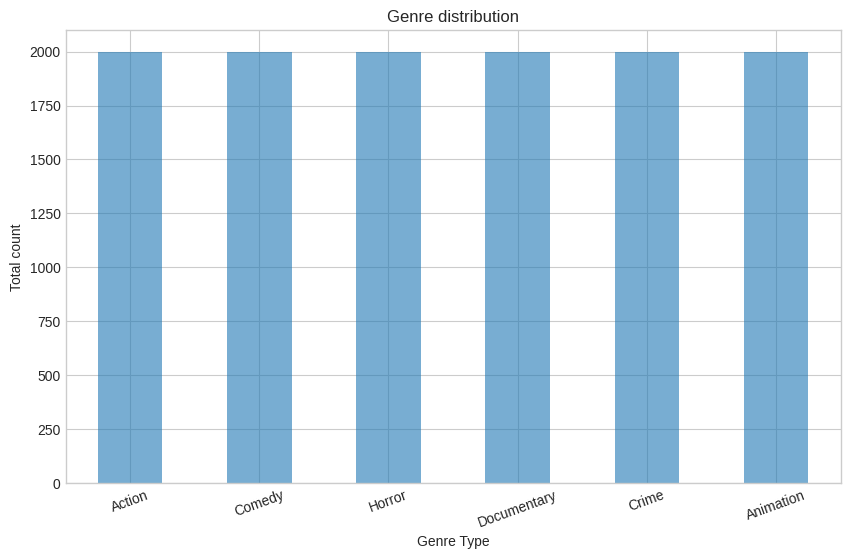

In [10]:
matplotlib.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 6), dpi=100)
ax = sb_df['Genre'].value_counts().plot(kind='bar', figsize=[10, 6], rot=20, alpha=0.6, title='Genre distribution')
ax.set_xlabel("Genre Type")
ax.set_ylabel("Total count")

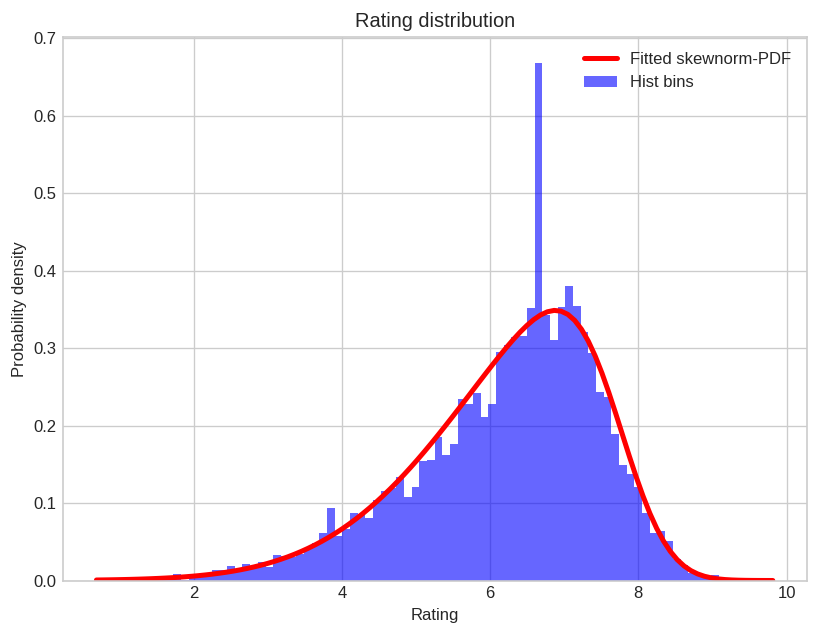

In [11]:
plt.figure(figsize=(8, 6), dpi=120)

plt.hist(sb_df['Rating'], 80, facecolor='blue', density=True, alpha=0.6, label='Hist bins')

params = stats.skewnorm.fit(sb_df['Rating'])

xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 100)
prob = stats.skewnorm.pdf(x_range, *params)
plt.plot(x_range, prob, 'r-', linewidth=3, label='Fitted skewnorm-PDF')

plt.legend(fontsize=10)

plt.xlabel('Rating')
plt.ylabel('Probability density')
plt.title('Rating distribution')
plt.grid(True)

plt.show()

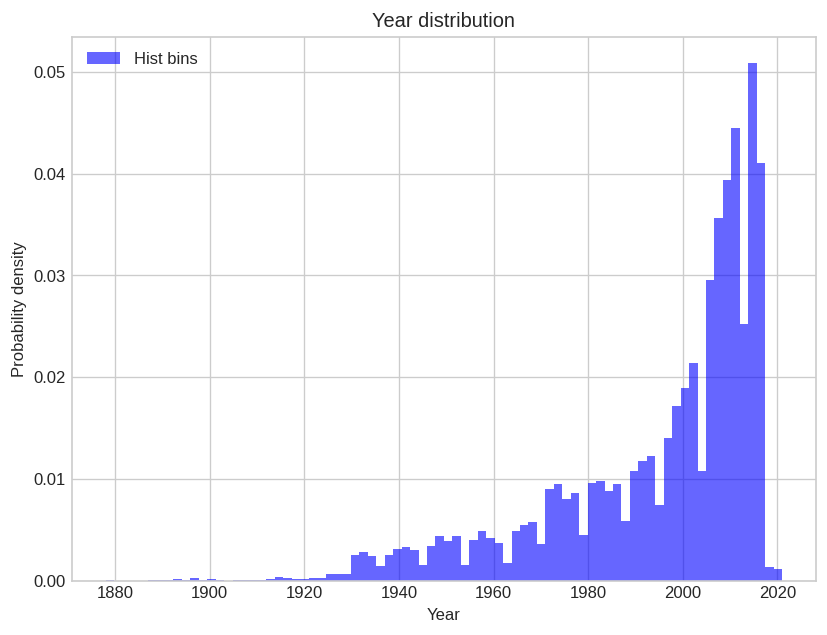

In [12]:
plt.figure(figsize=(8, 6), dpi=120)
plt.hist(sb_df['Year'], 80, facecolor='blue', density=True, alpha=0.6, label='Hist bins')

plt.legend(fontsize=10)
plt.xlabel('Year')
plt.ylabel('Probability density')
plt.title('Year distribution')
plt.grid(True)

plt.show()

## Exporting final data

In [13]:
import os

In [15]:
sb_df.to_pickle(os.path.join('/home/robotics/content-classification', 'data_processing', 'balanced_data.pkl'))